# CNN-LSTM architecture

This type of architecture is useful for different arquitectures, for instance, action recognition in video sequences. In order to show its use, we are going to create a syntethic dataset. 

The dataset is composed of videos where a point moves through the frames forming four different patterns: a constant point, a point ascending from bottom-left corner to top-right corner, a point descending from top-lef corner to bottom-right corner, and a point following a sin function. 

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from keras.utils import np_utils
from tensorflow.keras.layers import LSTM, Conv2D, Dense, TimeDistributed, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

Using TensorFlow backend.


In [2]:
%matplotlib notebook

In [3]:
import math
t = np.linspace(math.pi/10, 2*math.pi, num=20)
y = np.sin(t) + 0.05*np.random.randn(1, 20)
y = y.flatten()
i = 1
t2 = 6*i
y2 = int(np.round(23*(y[i-1]+1)+4))

In [4]:
def f(t2, y2):
    m = np.zeros((50,130))
    m[y2-3:y2+3,t2-3:t2+3] = 255
    return m

def updatefig(*args):
    global y,i
    if i == 20:
        i = 1
    t2 = 6*i
    y2 = int(np.round(23*(y[i-1]+1)+4))
    i += 1
    im.set_array(f(t2,y2))
    return im,

<IPython.core.display.Javascript object>


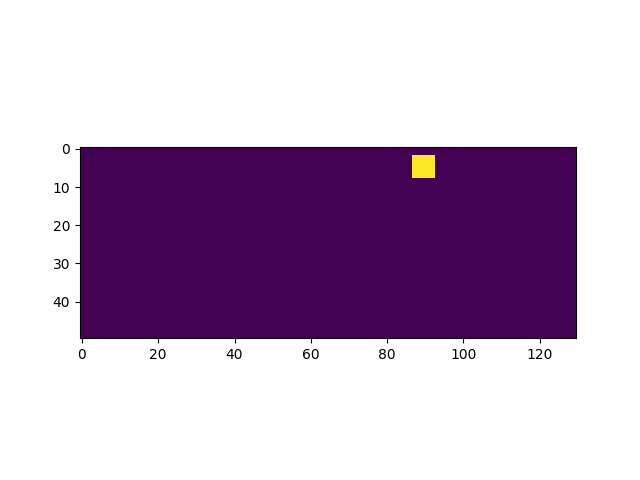

In [5]:
fig = plt.figure()
im = plt.imshow(f(t2, y2))
ani = animation.FuncAnimation(fig, updatefig, interval=50, frames=20, blit=True)
plt.show()

This is an example of a sin pattern.

In [6]:
from IPython.display import HTML
HTML(ani.to_jshtml())

The data must have the form **[n_samples,n_times,n_rows,n_columns,n_channels]**

In [153]:
#Class sin
Videos1 = np.zeros((20,20,50,130,1))
for j in range(20):
    y = np.sin(t) + 0.05*np.random.randn(1, 20)
    y = y.flatten()
    for i in range(20):
        t2 = 6*(i+1)
        y2 = int(np.round(23*(y[i]+1)+4))
        Videos1[j,i,:,:,0] = f(t2,y2)/255
#Class constan
Videos2 = np.zeros((20,20,50,130,1))
for j in range(20):
    for i in range(20):
        t2 = int(np.round(25 + np.random.randn(1)))
        y2 = int(np.round(65 + np.random.randn(1)))
        Videos2[j,i,:,:,0] = f(t2,y2)/255
#Class ascending
Videos3 = np.zeros((20,20,50,130,1))
for j in range(20):
    for i in range(20):
        t2 = 6*(i+1)
        y2 = int(np.round(2*(i+1) + 2 + np.random.randn(1)))
        Videos3[j,i,:,:,0] = f(t2,y2)/255
#Class descending
Videos4 = np.zeros((20,20,50,130,1))
for j in range(20):
    for i in range(20):
        t2 = 6*(i+1)
        y2 = int(np.round(2*(20-i)+ 2 + np.random.randn(1)))
        Videos4[j,i,:,:,0] = f(t2,y2)/255
Videos = np.concatenate((Videos1,Videos2,Videos3,Videos4),axis=0)

In [107]:
Videos.shape

(80, 20, 50, 130, 1)

In [111]:
Y = np.r_[np.zeros(20),np.ones(20),2*np.ones(20),3*np.ones(20)]
Y.shape

(80,)

In [113]:
# convert list of labels to binary class matrix
y_trainOHE = np_utils.to_categorical(Y)
nb_classes = y_trainOHE.shape[1]

In [114]:
nb_classes

4

There are two ways to define the network: 

In [ ]:
# define CNN model
cnn = Sequential()
cnn.add(Conv2D(...))
cnn.add(MaxPooling2D(...))
cnn.add(Flatten())
# define LSTM model
model = Sequential()
model.add(TimeDistributed(cnn, ...))
model.add(LSTM(..))
model.add(Dense(...))

or

In [ ]:
model = Sequential()
# define CNN model
model.add(TimeDistributed(Conv2D(...))
model.add(TimeDistributed(MaxPooling2D(...)))
model.add(TimeDistributed(Flatten()))
# define LSTM model
model.add(LSTM(...))
model.add(Dense(...))

Let's define our architecture:

In [154]:
rows = 50
columns = 130
channels = 1

model = Sequential()
model.add(TimeDistributed(Conv2D(filters=5, kernel_size=(4, 4), 
                                 activation='relu', 
                                 padding='same', 
                                 input_shape=(rows, columns, channels))))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Conv2D(filters=5, kernel_size=(8, 8), 
                                 activation='relu', 
                                 padding='same', 
                                 input_shape=(rows, columns, channels))))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Conv2D(filters=5, kernel_size=(8, 8), 
                                 activation='relu', 
                                 padding='same', 
                                 input_shape=(rows, columns, channels))))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))

# add the LSTM layer, and a final Dense layer
model.add(LSTM(units=5, activation='relu', stateful=False))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [155]:
model.fit(Videos,y_trainOHE,epochs=50)

Epoch 1/50
80/80 [==============================] - 6s 77ms/step - loss: 1.3842 - acc: 0.0625
Epoch 2/50
80/80 [==============================] - 5s 61ms/step - loss: 1.3671 - acc: 0.4875
Epoch 3/50
80/80 [==============================] - 5s 60ms/step - loss: 1.3410 - acc: 0.5000
Epoch 4/50
80/80 [==============================] - 5s 61ms/step - loss: 1.2952 - acc: 0.5000
Epoch 5/50
80/80 [==============================] - 5s 60ms/step - loss: 1.2028 - acc: 0.5000
Epoch 6/50
80/80 [==============================] - 5s 61ms/step - loss: 0.9432 - acc: 0.5000
Epoch 7/50
80/80 [==============================] - 5s 65ms/step - loss: 1.0131 - acc: 0.4000
Epoch 8/50
80/80 [==============================] - 5s 61ms/step - loss: 0.6595 - acc: 0.5000
Epoch 9/50
80/80 [==============================] - 5s 62ms/step - loss: 0.6384 - acc: 0.5000
Epoch 10/50
80/80 [==============================] - 5s 60ms/step - loss: 0.6235 - acc: 0.5000
Epoch 11/50
80/80 [==============================] - 5s 62m

In [156]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_42 (TimeDis (None, 20, 50, 130, 5)    85        
_________________________________________________________________
time_distributed_43 (TimeDis (None, 20, 25, 65, 5)     0         
_________________________________________________________________
time_distributed_44 (TimeDis (None, 20, 25, 65, 5)     1605      
_________________________________________________________________
time_distributed_45 (TimeDis (None, 20, 12, 32, 5)     0         
_________________________________________________________________
time_distributed_46 (TimeDis (None, 20, 12, 32, 5)     1605      
_________________________________________________________________
time_distributed_47 (TimeDis (None, 20, 6, 16, 5)      0         
_________________________________________________________________
time_distributed_48 (TimeDis (None, 20, 480)           0         
__________

Let's create a new set of videos to validate the model:

In [157]:
#Class sin
Videos1 = np.zeros((20,20,50,130,1))
for j in range(20):
    y = np.sin(t) + 0.05*np.random.randn(1, 20)
    y = y.flatten()
    for i in range(20):
        t2 = 6*(i+1)
        y2 = int(np.round(23*(y[i]+1)+4))
        Videos1[j,i,:,:,0] = f(t2,y2)/255
#Class constan
Videos2 = np.zeros((20,20,50,130,1))
for j in range(20):
    for i in range(20):
        t2 = int(np.round(25 + np.random.randn(1)))
        y2 = int(np.round(65 + np.random.randn(1)))
        Videos2[j,i,:,:,0] = f(t2,y2)/255
#Class ascending
Videos3 = np.zeros((20,20,50,130,1))
for j in range(20):
    for i in range(20):
        t2 = 6*(i+1)
        y2 = int(np.round(2*(i+1) + 2 + np.random.randn(1)))
        Videos3[j,i,:,:,0] = f(t2,y2)/255
#Class descending
Videos4 = np.zeros((20,20,50,130,1))
for j in range(20):
    for i in range(20):
        t2 = 6*(i+1)
        y2 = int(np.round(2*(20-i)+ 2 + np.random.randn(1)))
        Videos4[j,i,:,:,0] = f(t2,y2)/255
Videos = np.concatenate((Videos1,Videos2,Videos3,Videos4),axis=0)

In [162]:
y_est = np.argmax(model.predict(Videos),axis=1)
print('accuracy testing = {}'.format(np.sum(y_est==Y)/80))

accuracy testing = 1.0
